****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Nepal                              12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64


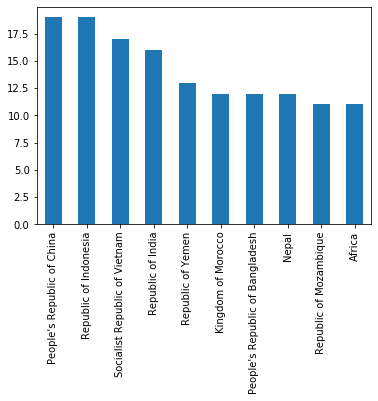

In [54]:
# 0 Load the correct file and put into a dataframe. Then tidy it up.
# load the packages
import pandas as pd
import json
from pandas.io.json import json_normalize

#load the data, read it as a json file
json.load((open('data/world_bank_projects.json')))
wbp_df = pd.read_json('data/world_bank_projects.json')

# 1 Finding the 10 countries with most projects
# find the top ten countries
top_ten_countries = wbp_df['countryname'].value_counts().head(10)
print(top_ten_countries)
# display top ten countries as a chart
tencountries.plot(kind='bar')

<class 'pandas.core.frame.DataFrame'>


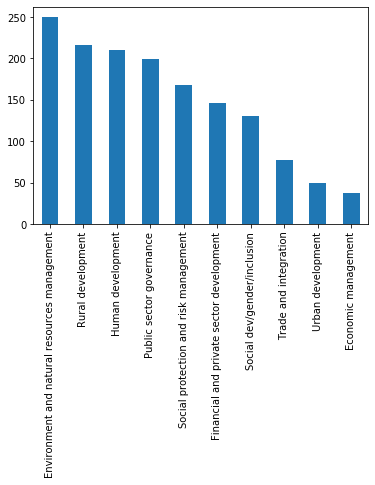

In [67]:
# 2 & 3 Finding the top 10 project themes and recoding the missings
# Re-read the file and normalize to account for nesting

data2 = json.load((open('data/world_bank_projects.json')))
theme_normed = json_normalize(data2, 'mjtheme_namecode', ['_id', 'approvalfy',
                                                          'board_approval_month',
                                                          'countryshortname', 'grantamt',
                                                          'sector'])
theme_normed.head(20)
print(type(theme_normed))
# sort by the code and then forward fill the theme names
sorted_theme = theme_normed.set_index('code').sort_index()
sorted_theme['name']=sorted_theme['name'].replace('',method='ffill')
# find the top ten themes
top_ten_themes = sorted_theme['name'].value_counts().head(10)
# plot them
top_ten_themes.plot(kind='bar')

Question 3. I did this as part of Question 2 because that seemed most efficient. I could also have done it by making a dictionary of code-theme_name pairs and then joining that to the normalized data set but this approach seemed easier.